# Introduction

Welcome to the California Housing Prices Prediction Project! The main objective of this project is to predict housing prices in California using linear regression. We will be using the Housing.csv dataset, which contains various features related to housing properties in California.



### Objective

The primary objective of this project is to **develop a predictive model** bold text using **linear regression** to estimate house prices based on the features provided in the dataset. By the end of this project, we aim to:

- **Understand the relationship** between various features and house prices.
- **Build a linear regression model** to predict house prices.
- **Evaluate the performance of the model** using appropriate metrics.
- **Visualize the results** to gain further insights into the model's accuracy.

###Project Steps

<details>
  <summary><font color='gold'>Environment Setup</font></summary>
  <ul>
    <li>Install necessary libraries and dependencies for the project.</li>
    <li>Set up the development environment and configure the workspace.</li>
  </ul>
</details>
<details>
  <summary><font color='gold'>Exploratory Data Analysis (EDA)</font></summary>
  <ul>
    <li>Load the housing.csv dataset and perform an initial exploration to understand its structure and contents.</li>
    <li>Examine the features and target variable, and gain insights into the data distribution.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Data Preprocessing</font></summary>
  <ul>
    <li>Handle any missing values in the dataset to ensure data integrity.</li>
    <li>Encode categorical variables if present and scale numerical features to standardize the data.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Data Splitting</font></summary>
  <ul>
    <li>Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Model Training</font></summary>
  <ul>
    <li>Implement a linear regression model using the training data.</li>
    <li>Train the model to learn the relationship between the features and the target variable (house prices).</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Model Evaluation</font></summary>
  <ul>
    <li>Assess the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).</li>
    <li>Evaluate how well the model predicts house prices on the testing set.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Results Visualization</font></summary>
  <ul>
    <li>Create visualizations to compare the actual house prices with the predicted prices.</li>
    <li>Analyze the residuals to check for any patterns or discrepancies.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Conclusion</font></summary>
  <ul>
    <li>Summarize the findings and discuss the model's strengths and potential areas for improvement.</li>
  </ul>
</details>


### Dataset Information

1. <font color= 'lightblue'>longitude: </font>A measure of how far west a house is; a higher value is farther west
2. <font color= 'lightblue'>latitude: </font> A measure of how far north a house is; a higher value is farther north
3. <font color= 'lightblue'>housingMedianAge: </font> Median age of a house within a block; a lower number is a newer building
4. <font color= 'lightblue'>totalRooms: </font> Total number of rooms within a block
5. <font color= 'lightblue'>totalBedrooms: </font> Total number of bedrooms within a block
6. <font color= 'lightblue'>population: </font> Total number of people residing within a block
7. <font color= 'lightblue'>households: </font> Total number of households, a group of people residing within a home unit, for a block
8. <font color= 'lightblue'>medianIncome: </font> Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. <font color= 'lightblue'>medianHouseValue: </font> Median house value for households within a block (measured in US Dollars)
10. <font color= 'lightblue'>oceanProximity: </font> Location of the house w.r.t ocean/sea

# Development

### Enviroment Setup

In [9]:
#Data Management Libraries
import pandas as pd
import numpy as np
#Visual Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# URL of the raw CSV file
url = 'https://raw.githubusercontent.com/Lucas-pin/IA-ML/main/housing.csv'

# Read the CSV file into a DataFrame
raw_data = pd.read_csv(url)


### Exploratory Data Analysis (EDA)

In [23]:
#First we need understand deepest the structure of dataset and what kind of data we are going to manipulate
print("Number of rows and columns:")
print(raw_data.shape, "\n")
print("Column names:")
print(raw_data.columns, "\n")
print("Data types and null qty:")
print(raw_data.info(),"\n")


Number of rows and columns:
(20640, 10) 

Column names:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object') 

Data types and null qty:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: fl

In [33]:
ocean_proximity_values = raw_data['ocean_proximity'].unique()
print(ocean_proximity_values)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


<font color = 'red'> *Note* :</font>
The following method summarizes statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for each numeric column of the DataFrame. Therefore, we need to separate numerical and categorical data to use it correctly.

In [40]:
numerical_data = raw_data.drop('ocean_proximity', axis = 1) # To drop a column you have to specified 'axis = 1'
categorical_data = raw_data['ocean_proximity']

In [43]:
numerical_data.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [51]:
variables = numerical_data.columns.tolist()
variables

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

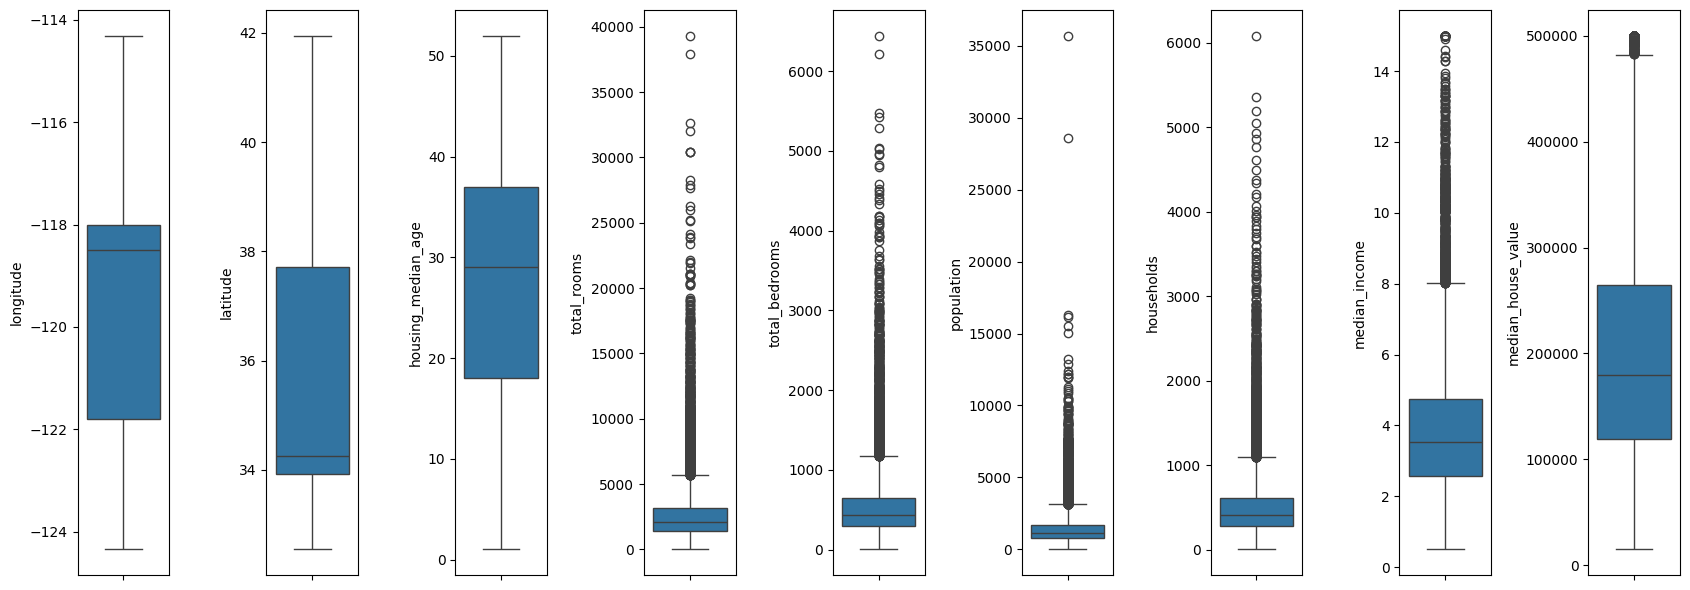

In [56]:
variables = numerical_data.columns.tolist()

fig, axes = plt.subplots(1, len(variables), figsize=(17,6))

for ax, column in zip(axes, variables):
    sns.boxplot(y=numerical_data[column], ax=ax)

plt.tight_layout()
plt.show()

In [42]:
categorical_data.describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

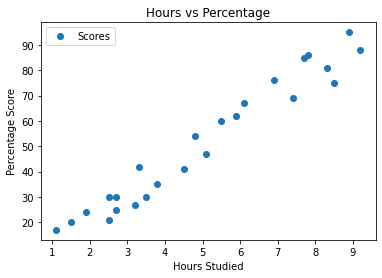

In [ ]:
#Ploteamos el dataset
dataset.plot(x='Hours', y='Scores', style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
#Preparacion de datos
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Recuperamos la intersección
print(regressor.intercept_)

2.826892353899737


In [ ]:
#La pendiente
print(regressor.coef_)

[9.68207815]


In [ ]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

El y_pred es una matriz numpy que contiene todos los valores predichos para los valores de entrada en la X_test

In [ ]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


**Evaluación del modelo**:

El último paso es evaluar el rendimiento del algoritmo. Este paso es particularmente importante para comparar qué tan bien funcionan los diferentes algoritmos en un conjunto de datos en particular. Para los algoritmos de regresión, se utilizan comúnmente tres métricas de evaluación:

* El error absoluto medio (MAE)
* El error cuadrático medio (MSE)
* Root Mean Squared Error (RMSE)

In [ ]:
import numpy as np
def mse(actual, predicted):
    return np.mean(np.square(actual-predicted))

In [ ]:
mse(y_test, y_pred)

18.943211722315272

In [ ]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [ ]:
mape(y_test, y_pred)

10.600118977553539

In [ ]:
def MDAPE(actual, predicted):
    return np.median(np.abs((actual - predicted) / actual)) * 100

In [ ]:
MDAPE(y_test,y_pred)

8.377326816257828

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


In [ ]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.9678055545167994


REGRESIÓN LINEAL MÚLTIPLE

In [ ]:
dataset = pd.read_csv("petrol_consumption (1).csv", sep = ",")

In [ ]:
#Vemos el head
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
#Estadisticas
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
#Preparación de datos
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [ ]:
#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Como se dijo anteriormente, en caso de regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, podemos ejecutar el siguiente script:

In [ ]:
regressor.coef_

array([-3.69937459e+01, -5.65355145e-02, -4.38217137e-03,  1.34686930e+03])

In [ ]:
regressor.intercept_

361.45087906653225

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-36.993746
Average_income,-0.056536
Paved_Highways,-0.004382
Population_Driver_licence(%),1346.869298


In [ ]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630


In [ ]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53.468541282916625
Mean Squared Error: 4083.2558717453767
Root Mean Squared Error: 63.90035893283681


In [ ]:
mape(y_test, y_pred)

10.250194382138334

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3913664001428886